# Observing reconstruction images by Convolutional Auto-Encoder.

This notebook demonstrates that the Convolutional Auto-Encoder can learn images and reconstruct its. Image data set for this demo is the [Weizmann horse dataset](https://avaminzhang.wordpress.com/2012/12/07/%E3%80%90dataset%E3%80%91weizmann-horses/).

Firstly, import Python and Cython modules for building Convolutional Auto-Encoder.

In [1]:
from pydbm.cnn.convolutional_neural_network import ConvolutionalNeuralNetwork
from pydbm.cnn.convolutionalneuralnetwork.residual_learning import ResidualLearning
from pydbm.cnn.convolutionalneuralnetwork.convolutional_auto_encoder import ConvolutionalAutoEncoder
from pydbm.cnn.layerablecnn.convolution_layer import ConvolutionLayer as ConvolutionLayer1
from pydbm.cnn.layerablecnn.convolution_layer import ConvolutionLayer as ConvolutionLayer2
from pydbm.cnn.featuregenerator.image_generator import ImageGenerator

In [2]:
from pydbm.activation.relu_function import ReLuFunction
from pydbm.activation.tanh_function import TanhFunction
from pydbm.activation.logistic_function import LogisticFunction
from pydbm.loss.mean_squared_error import MeanSquaredError
from pydbm.optimization.optparams.adam import Adam

In [3]:
from pydbm.synapse.cnn_graph import CNNGraph as ConvGraph1
from pydbm.synapse.cnn_graph import CNNGraph as ConvGraph2

In [4]:
from pydbm.verification.verificate_function_approximation import VerificateFunctionApproximation

Set hyperparameters of feature points in image data.

In [5]:
batch_size = 10
channel = 1
height = 100
width = 100
scale = 0.1

Instantiate objects and call the method.

In [6]:
conv1 = ConvolutionLayer1(
    ConvGraph1(
        activation_function=TanhFunction(),
        filter_num=batch_size,
        channel=channel,
        kernel_size=3,
        scale=scale,
        stride=1,
        pad=1
    )
)

conv2 = ConvolutionLayer2(
    ConvGraph2(
        activation_function=TanhFunction(),
        filter_num=batch_size,
        channel=batch_size,
        kernel_size=3,
        scale=scale,
        stride=1,
        pad=1
    )
)

cnn = ConvolutionalAutoEncoder(
    layerable_cnn_list=[
        conv1, 
        conv2
    ],
    epochs=100,
    batch_size=batch_size,
    learning_rate=1e-05,
    learning_attenuate_rate=0.1,
    attenuate_epoch=25,
    computable_loss=MeanSquaredError(),
    opt_params=Adam(),
    verificatable_result=VerificateFunctionApproximation(),
    test_size_rate=0.3,
    tol=1e-15,
    save_flag=False
)

feature_generator = ImageGenerator(
    epochs=100,
    batch_size=batch_size,
    training_image_dir="../../../../Downloads/gray/",
    test_image_dir="../../../../Downloads/gray/",
    seq_len=None,
    gray_scale_flag=True,
    wh_size_tuple=(100, 100),
    norm_mode="z_score"
)

In [7]:
from logging import getLogger, StreamHandler, NullHandler, DEBUG, ERROR

logger = getLogger("pydbm")
handler = StreamHandler()
handler.setLevel(ERROR)
logger.setLevel(ERROR)
logger.addHandler(handler)

Execute learning.

In [11]:
cnn.learn_generated(feature_generator)

## Extract reconstruction images.

The object `cnn` which is-a `ConvolutionalAutoEncoder` has a method `inference` to be able to reconstruct observed data points as feature points. The input test data and reconstructed data are as follows.

Generate training data: (10, 1, 100, 100)
Generate test data: (10, 1, 100, 100)


test data:


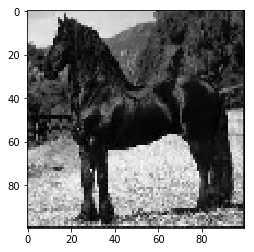

reconstructed data:


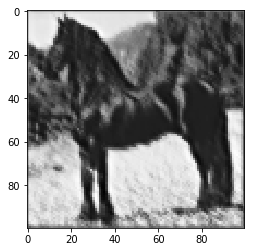

test data:


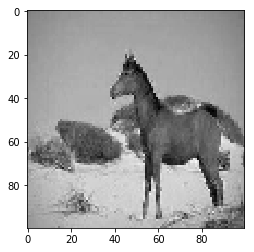

reconstructed data:


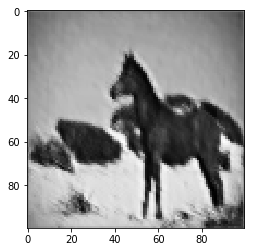

test data:


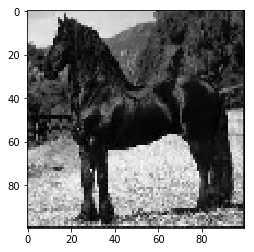

reconstructed data:


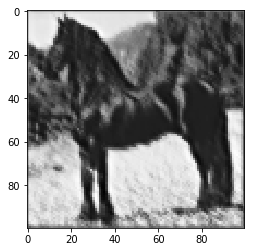

test data:


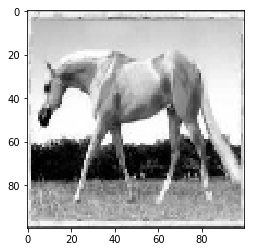

reconstructed data:


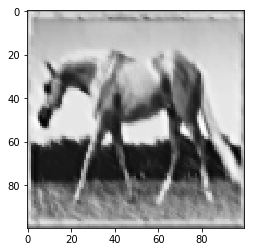

test data:


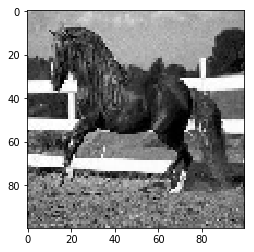

reconstructed data:


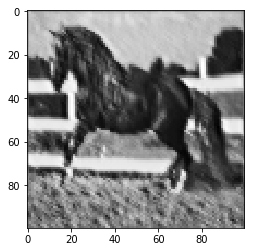

test data:


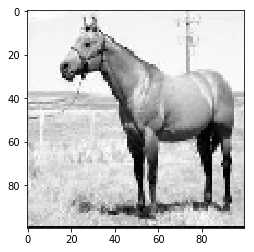

reconstructed data:


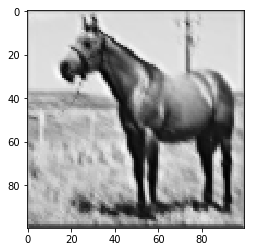

test data:


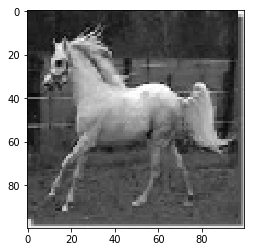

reconstructed data:


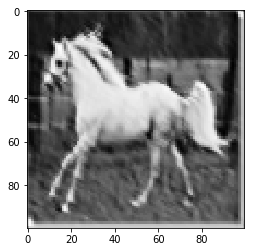

test data:


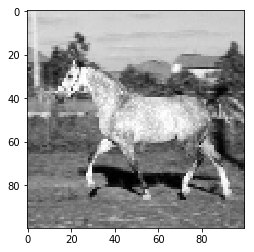

reconstructed data:


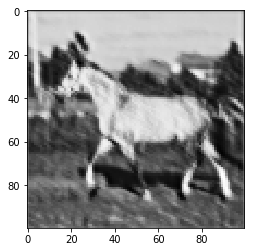

test data:


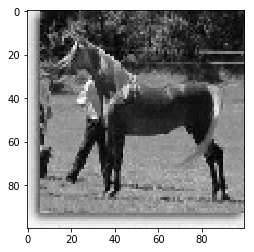

reconstructed data:


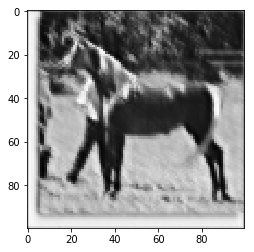

test data:


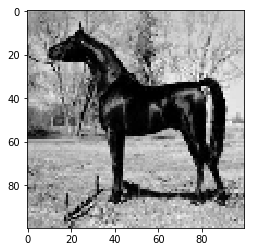

reconstructed data:


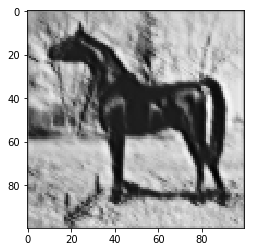

In [10]:
import matplotlib.pyplot as plt

test_len = 0
test_limit = 1

test_arr_list = []
rec_arr_list = []
for batch_observed_arr, batch_target_arr, test_batch_observed_arr, test_batch_target_arr in feature_generator.generate():
    test_len += 1
    result_arr = cnn.inference(test_batch_observed_arr)
    for batch in range(test_batch_target_arr.shape[0]):
        print("test data:")
        plt.imshow(test_batch_target_arr[batch][0], cmap="gray")
        plt.show()
        plt.close()
        test_arr_list.append(test_batch_target_arr[batch][0])
        print("reconstructed data:")
        plt.imshow(result_arr[batch][0], cmap="gray")
        rec_arr_list.append(result_arr[batch][0])
        plt.show()
        plt.close()
    if test_len >= test_limit:
        break
